# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5</center>

# <center>Feature Engineering</center>

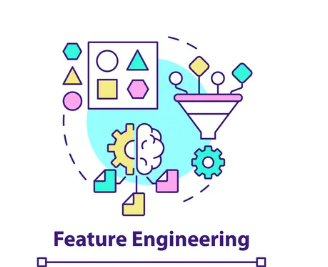

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



In [2]:
# Write your solution here
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('loan_train.csv')
n_ndf = df.select_dtypes(include = 'number')
impute = SimpleImputer(strategy='mean')
ndf = impute.fit_transform(n_ndf)
ndf = pd.DataFrame(data = ndf, columns = n_ndf.columns)
ndf.isna().sum()


ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

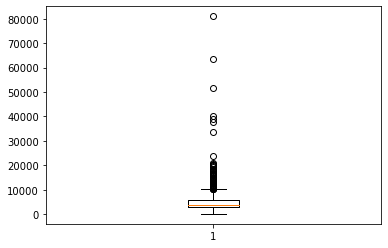

In [3]:
#Write your solution here
import matplotlib.pyplot as plt 
plt.boxplot(ndf['ApplicantIncome'])
plt.show()

In [4]:
Q1 = ndf.ApplicantIncome.quantile(0.25)
Q3 = ndf.ApplicantIncome.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
ndf1 = df[(df.ApplicantIncome > lowerlimit) & (df.ApplicantIncome < upperlimit)]
ndf1.shape


(564, 13)

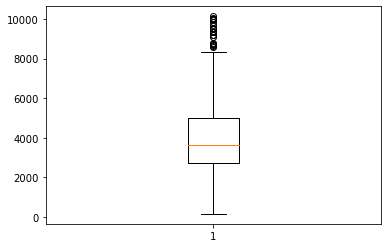

In [5]:
plt.boxplot(ndf1['ApplicantIncome'])
plt.show()

In [9]:
std = df.ApplicantIncome.std()
mean = df.ApplicantIncome.mean()
upperlimit = mean + (3 * std)
lowerlimit = mean - (3 * std)
ndf1 = ndf1[(ndf1.ApplicantIncome > lowerlimit) & (ndf1.ApplicantIncome < upperlimit)]
ndf1.shape

(564, 13)

## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

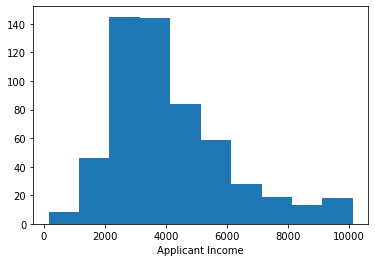

In [12]:
plt.hist(ndf1.ApplicantIncome,bins=10)
plt.xlabel("Applicant Income")
plt.show()

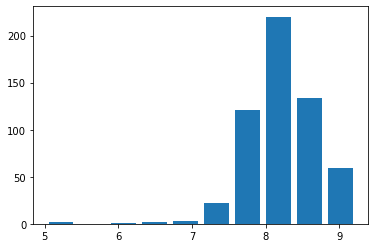

In [16]:
# Write your solution here
import numpy as np
x = np.log(ndf1['ApplicantIncome'])
plt.hist(x,bins=10,rwidth=0.8)
plt.show()



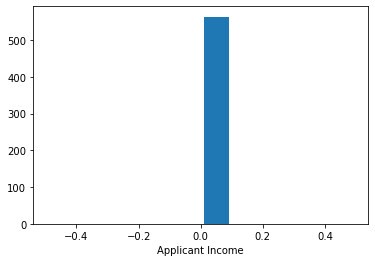

In [17]:
x = np.reciprocal(ndf1.ApplicantIncome)
plt.hist(x,bins=10,rwidth=0.8)
plt.xlabel("Applicant Income")
plt.show()

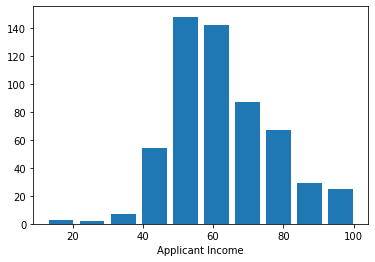

In [18]:
x = np.sqrt(ndf1.ApplicantIncome)
plt.hist(x,bins=10,rwidth=0.8)
plt.xlabel("Applicant Income")
plt.show()

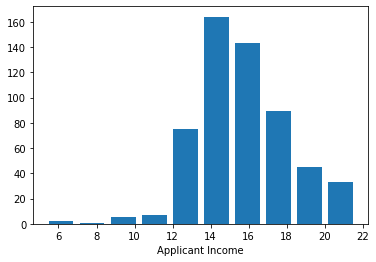

In [19]:
x = np.cbrt(ndf1.ApplicantIncome)
plt.hist(x,bins=10,rwidth=0.8)
plt.xlabel("Applicant Income")
plt.show()

## 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [22]:
# Write your solution here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
numeric = scaler.fit_transform(ndf)
newdf = pd.DataFrame(numeric,columns=ndf.columns)
newdf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.070489           0.000000    0.198860           0.74359   
1         0.054830           0.036192    0.172214           0.74359   
2         0.035250           0.000000    0.082489           0.74359   
3         0.030093           0.056592    0.160637           0.74359   
4         0.072356           0.000000    0.191027           0.74359   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(ndf)
scaledf = pd.DataFrame(numeric,columns=ndf.columns)
scaledf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.072991          -0.554487    0.000000          0.279851   
1        -0.134412          -0.038732   -0.219273          0.279851   
2        -0.393747          -0.554487   -0.957641          0.279851   
3        -0.462062           0.251980   -0.314547          0.279851   
4         0.097728          -0.554487   -0.064454          0.279851   

   Credit_History  
0         0.45164  
1         0.45164  
2         0.45164  
3         0.45164  
4         0.45164

In [24]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numeric = scaler.fit_transform(ndf)
robustdf = pd.DataFrame(numeric,columns=ndf.columns)
robustdf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.698029          -0.517358    0.269956               0.0   
1         0.264096           0.139079   -0.015504               0.0   
2        -0.278492          -0.517358   -0.976744               0.0   
3        -0.421422           0.509087   -0.139535               0.0   
4         0.749786          -0.517358    0.186047               0.0   

   Credit_History  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [25]:
# Write your solution here
df1 = pd.read_csv('loan_train.csv')
categorical_cols =  df.select_dtypes(include = ['object','bool'])
impute = SimpleImputer(strategy='most_frequent')
data = impute.fit_transform(categorical_cols)
cdf1 = pd.DataFrame(data, columns=categorical_cols.columns)
cdf1.drop(columns = 'Loan_ID', inplace =True)
cdf1.isna().sum()



Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [26]:
categorical_columns = ['Gender','Married','Self_Employed']
cdf2= cdf1[categorical_columns]
cdf2 = pd.get_dummies(cdf2)
cdf2

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0                0            1           1            0                 1   
1                0            1           0            1                 1   
2                0            1           0            1                 0   
3                0            1           0            1                 1   
4                0            1           1            0                 1   
..             ...          ...         ...          ...               ...   
609              1            0           1            0                 1   
610              0            1           0            1                 1   
611              0            1           0            1                 1   
612              0            1           0            1                 1   
613              1            0           1            0                 0   

     Self_Employed_Yes  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0  
..                 ...  
609                  0  
610                  0  
611                  0  
612                  0  
613                  1  

[614 rows x 6 columns]

In [27]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
cdf1[['Property_Area','Education']] = oe.fit_transform(cdf1[['Property_Area','Education']])
cdf3 = pd.DataFrame(cdf1)
cdf3

Gender Married Dependents  Education Self_Employed  Property_Area  \
0      Male      No          0        0.0            No            2.0   
1      Male     Yes          1        0.0            No            0.0   
2      Male     Yes          0        0.0           Yes            2.0   
3      Male     Yes          0        1.0            No            2.0   
4      Male      No          0        0.0            No            2.0   
..      ...     ...        ...        ...           ...            ...   
609  Female      No          0        0.0            No            0.0   
610    Male     Yes         3+        0.0            No            0.0   
611    Male     Yes          1        0.0            No            2.0   
612    Male     Yes          2        0.0            No            2.0   
613  Female      No          0        0.0           Yes            1.0   

    Loan_Status  
0             Y  
1             N  
2             Y  
3             Y  
4             Y  
..          ...  
609           Y  
610           Y  
611           Y  
612           Y  
613           N  

[614 rows x 7 columns]

In [28]:
cdf = pd.concat([cdf2,cdf3], axis=1)
cdf.drop(['Gender','Married','Self_Employed'], axis=1, inplace=True)
cdf

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0                0            1           1            0                 1   
1                0            1           0            1                 1   
2                0            1           0            1                 0   
3                0            1           0            1                 1   
4                0            1           1            0                 1   
..             ...          ...         ...          ...               ...   
609              1            0           1            0                 1   
610              0            1           0            1                 1   
611              0            1           0            1                 1   
612              0            1           0            1                 1   
613              1            0           1            0                 0   

     Self_Employed_Yes Dependents  Education  Property_Area Loan_Status  
0                    0          0        0.0            2.0           Y  
1                    0          1        0.0            0.0           N  
2                    1          0        0.0            2.0           Y  
3                    0          0        1.0            2.0           Y  
4                    0          0        0.0            2.0           Y  
..                 ...        ...        ...            ...         ...  
609                  0          0        0.0            0.0           Y  
610                  0         3+        0.0            0.0           Y  
611                  0          1        0.0            2.0           Y  
612                  0          2        0.0            2.0           Y  
613                  1          0        0.0            1.0           N  

[614 rows x 10 columns]

## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [29]:
#Write your solution here
alldf = pd.concat([cdf, ndf], axis=1)
alldf.head()
alldf.isna().sum()

Gender_Female        0
Gender_Male          0
Married_No           0
Married_Yes          0
Self_Employed_No     0
Self_Employed_Yes    0
Dependents           0
Education            0
Property_Area        0
Loan_Status          0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [30]:
alldf.head()

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0              0            1           1            0                 1   
1              0            1           0            1                 1   
2              0            1           0            1                 0   
3              0            1           0            1                 1   
4              0            1           1            0                 1   

   Self_Employed_Yes Dependents  Education  Property_Area Loan_Status  \
0                  0          0        0.0            2.0           Y   
1                  0          1        0.0            0.0           N   
2                  1          0        0.0            2.0           Y   
3                  0          0        1.0            2.0           Y   
4                  0          0        0.0            2.0           Y   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0  146.412162             360.0   
1           4583.0             1508.0  128.000000             360.0   
2           3000.0                0.0   66.000000             360.0   
3           2583.0             2358.0  120.000000             360.0   
4           6000.0                0.0  141.000000             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

# <center>THANK YOU